In [157]:
# Exploratory data analysis (EDA) is a statistical method for analyzing data sets to identify their main characteristics and patterns.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r"housing.csv", encoding="utf-8")

In [5]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [9]:
# fill missing values in total_bedrooms with average number of bedrooms

In [35]:
average_bedrooms = df["total_bedrooms"].mean().astype(int)
average_bedrooms

537

In [41]:
df.fillna({"total_bedrooms": average_bedrooms}, inplace=True)

In [39]:
df["total_bedrooms"] = df["total_bedrooms"].fillna(average_bedrooms)

In [43]:
# Calculate Average Rooms per House and save the results in a new column "average_rooms"
# Calculate Average Bedrooms per House and save the results in a new column "average_bedrooms"
# Calculate Average Number of People per Household and save the results in a new column "people_house"

In [45]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [63]:
df["average_rooms"] = (df["total_rooms"] / df["households"]).round(1)
df["average_bedrooms"] = (df["total_bedrooms"] / df["households"]).round(1)
df["people_house"] = (df["population"] / df["households"]).round(1)

In [65]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,average_rooms,average_bedrooms,people_house
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,7.0,1.0,2.6
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.2,1.0,2.1
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.3,1.1,2.8
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.8,1.1,2.5
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.3,1.1,2.2


In [67]:
# plot as a scatter x = longitude, y = latitude, s = population
# get longitude and latitude for LA and SF and plot them as stars

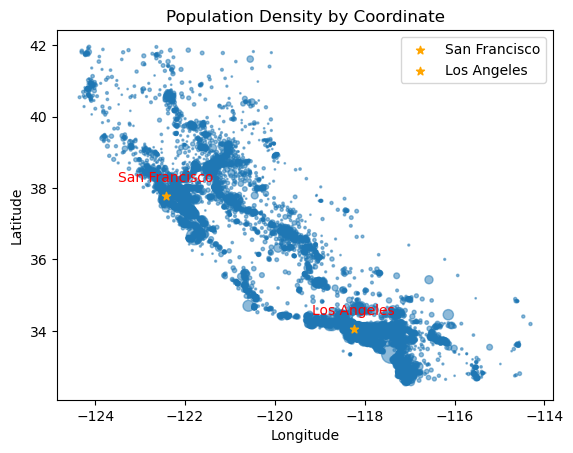

In [163]:
SF = (-122.43, 37.77)
LA = (-118.25, 34.05)

plt.scatter(df["longitude"], df["latitude"], df["population"] // 200, alpha = 0.5)
plt.scatter(SF[0], SF[1], color = "orange", marker = "*", label = "San Francisco")
plt.scatter(LA[0], LA[1], color = "orange", marker = "*", label = "Los Angeles")
plt.annotate("San Francisco", SF, textcoords = "offset points", xytext = (0, 10), ha = "center", color = "red")
plt.annotate("Los Angeles", LA, textcoords = "offset points", xytext = (0, 10), ha = "center", color = "red")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Population Density by Coordinate")
plt.legend()
plt.show()

In [97]:
# plot as bar chart number of houses based on ocean_proximity

<Axes: xlabel='ocean_proximity'>

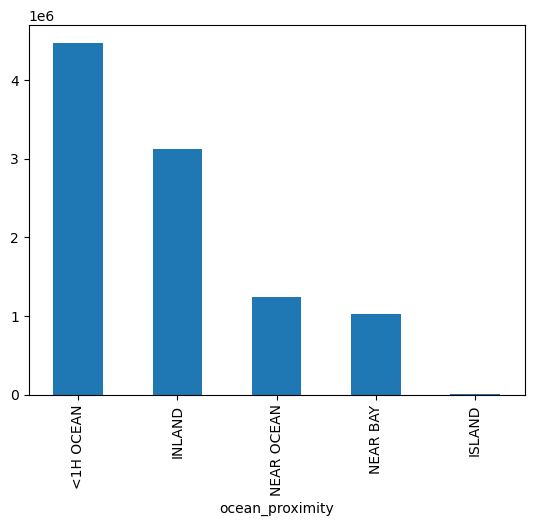

In [165]:
ocean_by_house = df.groupby("ocean_proximity")["households"].sum()
ocean_by_house.sort_values(ascending=False, inplace=True)
ocean_by_house.plot.bar()

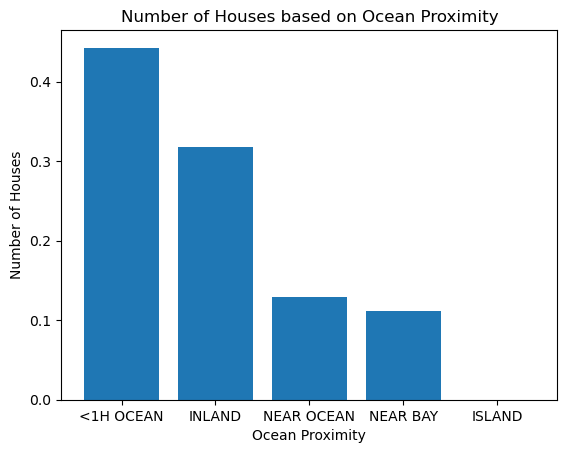

In [129]:
ocean_proximity = df["ocean_proximity"].value_counts(True)
plt.bar(ocean_proximity.index, ocean_proximity.values)
plt.xlabel("Ocean Proximity")
plt.ylabel("Number of Houses")
plt.title("Number of Houses based on Ocean Proximity")
plt.show()

In [131]:
# plot average distribution of median_house_value as historgram

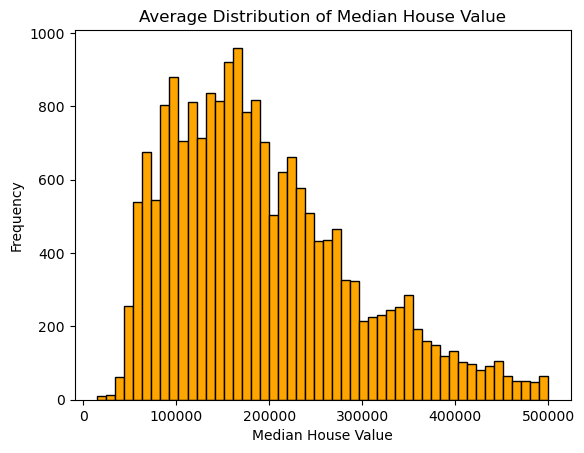

In [147]:
greater_than_500000 = df[df["median_house_value"] > 500000].index
df.drop(greater_than_500000, inplace=True)

plt.hist(df["median_house_value"], bins = 50, color = "orange", edgecolor = "black")
plt.xlabel("Median House Value")
plt.ylabel("Frequency")
plt.title("Average Distribution of Median House Value")
plt.show()